<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.852 · Tipología y ciclo de vida de los datos · PRA1</p>
<p style="margin: 0; text-align:right;">2025-1 · Máster universitario en Ciencia de datos (Data science)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRACTICA 1: Web scraping

## 1. Settings

In this first section we are going to describe and explain the main libraries used in the notebook and why we need them:

- `requests`:
	Python library that allows the user to send HTTP/1.1 requests easily (POST, GET, PUT, etc.).
	It is beeing used to get the main content of the URLs used (GET request).


- `builtwith`:
	Python library that detects the technology used by a website (Apache, JQuery, Wordpress),
	the servers and several relevant information.  
	It will be applied for detecting teh etchnology used for developing the web's design, as it will
	define the Web Scraping style that will be necessary to apply.
    

- `beautifulsoup4`:
	Python library to scrape information from web pages easily through it HTML or XML file.
	It is the main library for scraping all the information from the main URL.


- `python-whois`:
	Python library that produces parsed WHOIS data for a given URL to be able to extract data for all
	the popular TLDs (com, org, net, …). Also it enables the query of a WHOIS server directly instead of
	going through an intermediate web service.
	This library allows us to know the owner of the webpage we want to scrape and to see if there are any
	scraping blockers.


- `session-info`:
    Python library that outputs version information for modules loaded in the current session, Python, the OS,
    and the CPU.
    As extracting a "requirements.txt" file using pip freeze would bring too much innecessary data, this library
    will solve the problem by just showing the modeles beeing used in this notebook and osme other relevant dependencies.

### 1.1 Installations

If any of the forementioned libraries is not installed in the user's machine, this piece of code will installed them:

In [63]:
!pip install requests
!pip install builtwith
!pip install beautifulsoup4
!pip install python-whois
!pip install session-info

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Web Scraping')

### 1.2 Imports

Once the libraries are all installed in the machine, it is time to import them to this notebook:

In [64]:
import requests
import builtwith
import whois
from bs4 import BeautifulSoup
import re
import pandas as pd
import session_info

## 2. Information about the main URL

In [17]:
URL = 'https://arxiv.org/search/advanced?advanced=1&terms-0-operator=AND&terms-0-term=&terms-0-field=title&classification-mathematics=y&classification-physics_archives=all&classification-include_cross_list=include&date-year=&date-filter_by=date_range&date-from_date=2025-03-01&date-to_date=2025-07-01&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first'

In [18]:
# Let's check the technologies of the webpage we want to scrap
builtwith.parse(URL)

{'web-servers': ['Google App Engine'],
 'javascript-graphics': ['MathJax'],
 'javascript-frameworks': ['jQuery', 'math.js']}

In [21]:
# Let's see the content of the webpage
headers = {
    "User-Agent": "UOC Data Science scrapper bot.",
    "From": "clopezvice@uoc.edu",
    "Accept-Language": "en, es-ES;q=0.9"
}

page = requests.get(URL, headers = headers)
page.raise_for_status()


In [10]:
# Let's see the owner of the domain
print(whois.whois("arxiv.org"))

{
  "domain_name": "arxiv.org",
  "registrar": "Network Solutions, LLC",
  "registrar_url": "http://www.networksolutions.com",
  "reseller": null,
  "whois_server": "whois.networksolutions.com",
  "referral_url": null,
  "updated_date": [
    "2022-08-03 15:19:44+00:00",
    "2020-06-16 16:45:09+00:00"
  ],
  "creation_date": "1998-12-28 05:00:00+00:00",
  "expiration_date": "2029-12-28 05:00:00+00:00",
  "name_servers": [
    "ns-cloud-d4.googledomains.com",
    "ns-cloud-d1.googledomains.com",
    "ns-cloud-d3.googledomains.com",
    "ns-cloud-d2.googledomains.com"
  ],
  "status": "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
  "emails": [
    "domain.operations@web.com",
    "cbf@tech.cornell.edu"
  ],
  "dnssec": "unsigned",
  "name": null,
  "org": null,
  "address": "2 W LOOP RD",
  "city": "NEW YORK",
  "state": "NY",
  "registrant_postal_code": "10044-1501",
  "country": "US",
  "tech_name": null,
  "tech_org": null,
  "admin_name": null,
  "admin_

In [26]:
# Let's analyse the structure of the html code and show a bit of it
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify()[:100000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- new favicon config and versions by realfavicongenerator.net -->
  <link href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/site.webmanifest" rel="manifest"/>
  <link color="#b31b1b" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/safari-pinned-tab.svg" rel="mask-icon"/>
  <link href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon.ico" rel="shortcut icon"/>
  <meta content="#b31b1b" name="msapplicat

In [27]:
# Let's see this sessions dependencies and library versions
session_info.show()

## 2.1 User agent

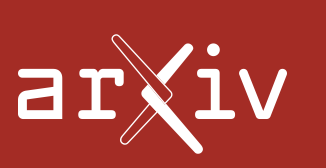

In [15]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Web Scraping/arxiv.png'))

https://arxiv.org/robots.txt



Podemos ver que el user agent que emplea python para acceder a la URL no está excluido en el dominio del archivo robots de la página, por lo que no hay problema en la configuración por defecto de python para hacer web scraping.

## 3. Test Web Scraping (for URL)

In [29]:
paper_1 = soup.select('li.arxiv-result')[12]
print(paper_1)


<li class="arxiv-result">
<div class="is-marginless">
<p class="list-title is-inline-block"><a href="https://arxiv.org/abs/2507.08819">arXiv:2507.08819</a>
<span> [<a href="https://arxiv.org/pdf/2507.08819">pdf</a>, <a href="https://arxiv.org/ps/2507.08819">ps</a>, <a href="https://arxiv.org/format/2507.08819">other</a>] </span>
</p>
<div class="tags is-inline-block">
<span class="tag is-small is-link tooltip is-tooltip-top" data-tooltip="Soft Condensed Matter">cond-mat.soft</span>
<span class="tag is-small is-grey tooltip is-tooltip-top" data-tooltip="Dynamical Systems">math.DS</span>
</div>
</div>
<p class="title is-5 mathjax">
      
        Exploring global landscape of free energy for the coupled Cahn-Hilliard equations
      
    </p>
<p class="authors">
<span class="has-text-black-bis has-text-weight-semibold">Authors:</span>
<a href="/search/?searchtype=author&amp;query=Kagawa%2C+K">Keiichiro Kagawa</a>, 
      
      <a href="/search/?searchtype=author&amp;query=Watanabe%2C+T"

In [32]:
num_paper_1 = paper_1.select_one('p.list-title').get_text(strip=True)
num_paper_1

'arXiv:2507.08819[pdf,ps,other]'

In [41]:
tags_paper_1 = paper_1.select('span.tag')
tags_paper_1

[<span class="tag is-small is-link tooltip is-tooltip-top" data-tooltip="Soft Condensed Matter">cond-mat.soft</span>,
 <span class="tag is-small is-grey tooltip is-tooltip-top" data-tooltip="Dynamical Systems">math.DS</span>]

In [42]:
tittle_paper_1 = paper_1.select_one('p.title').get_text(strip=True)
tittle_paper_1

'Exploring global landscape of free energy for the coupled Cahn-Hilliard equations'

In [44]:
authors_paper_1 = paper_1.select('p.authors a')
authors_paper_1

[<a href="/search/?searchtype=author&amp;query=Kagawa%2C+K">Keiichiro Kagawa</a>,
 <a href="/search/?searchtype=author&amp;query=Watanabe%2C+T">Takeshi Watanabe</a>,
 <a href="/search/?searchtype=author&amp;query=Nishiura%2C+Y">Yasumasa Nishiura</a>]

In [59]:
abstract_short_paper_1 = paper_1.select_one('span.abstract-short').get_text(strip=True)
abstract_short_paper_1

'Describing the complex landscape of infinite-dimensional free energy is generally a challenging problem. This difficulty arises from the existence of numerous minimizers and, consequently, a vast number of saddle points. These factors make it challenging to predict the location of desired configurations or to forecast the trajectories and pathways leading from an initial condition to the final sta…▽ More'

In [58]:
abstract_paper_1 = paper_1.select_one('span.abstract-full').get_text(strip=True)
abstract_paper_1

"Describing the complex landscape of infinite-dimensional free energy is generally a challenging problem. This difficulty arises from the existence of numerous minimizers and, consequently, a vast number of saddle points. These factors make it challenging to predict the location of desired configurations or to forecast the trajectories and pathways leading from an initial condition to the final state. In contrast, experimental observations demonstrate that specific morphologies can be reproducibly obtained in high yield under controlled conditions, even amidst noise. This study investigates the possibility of elucidating the global structure of the free energy landscape and enabling the control of orbits toward desired minimizers without relying on exhaustive brute-force methods. Furthermore, it seeks to mathematically explain the efficacy of certain experimental setups in achieving high-yield outcomes. Focusing on the phase separation of two polymers in a solvent, we conduct a one-dim

In [61]:
submited_paper_1 = paper_1.select_one('p.is-size-7').get_text(strip=True)
submited_paper_1

'Submitted28 June, 2025;originally announcedJuly 2025.'

In [62]:
comments_paper_1 = paper_1.select_one('p.comments').get_text(strip=True)
comments_paper_1

'Comments:33 pages, 20 figures, 6 tables'